In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Error
$$\epsilon_{i}(P_j) = \frac{R_{E_i}(P_j)-R_{M_i}(P_j)}{R_{M_i}(P_j)}$$
### Root Mean Square
$$ X_{RMS} = \sqrt{\frac{1}{N} \sum_{n=1}^{N} |\epsilon_n|^2} $$

In [2]:
def error(ap, rv):
    error = ((ap - rv) / rv) * 100
    mean = np.mean(np.abs(error))
    xrms = np.sqrt(np.mean(np.abs(error)**2))
    mean = round(mean, 3)
    xrms = round(xrms, 3)
    return mean, xrms

### El Alto

In [9]:
# RAOB
raob = pd.read_csv('TCWV/ElAlto/CCDF_RAOB.csv')
riwv = raob['IWV'].to_numpy()
ra20 = raob['A20'].to_numpy()
ra40 = raob['A40'].to_numpy()
ra50 = raob['A50'].to_numpy()
ra75 = raob['A75'].to_numpy()
# ERA5 12:00
era5 = pd.read_csv('TCWV/ElAlto/Data-50-19/csv-results/CCDF_ERA5-1200.csv')
eiwv = era5['IWV'].to_numpy()
ea20 = era5['A20'].to_numpy()
ea40 = era5['A40'].to_numpy()
ea50 = era5['A50'].to_numpy()
ea75 = era5['A75'].to_numpy()
# ERA5 24 hours
era5t = pd.read_csv('TCWV/ElAlto/Data-50-19/csv-results/CCDF_ERA5-00-24.csv')
etiwv = era5t['IWV'].to_numpy()
eta20 = era5t['A20'].to_numpy()
eta40 = era5t['A40'].to_numpy()
eta50 = era5t['A50'].to_numpy()
eta75 = era5t['A75'].to_numpy()
# ITU
itu = pd.read_csv('TCWV/ElAlto/CCDF_ITU.csv')
iiwv = itu['IWV'].to_numpy()
ia20 = itu['A20'].to_numpy()
ia40 = itu['A40'].to_numpy()
ia50 = itu['A50'].to_numpy()
ia75 = itu['A75'].to_numpy()
prob = itu['Probabilities'].to_numpy()

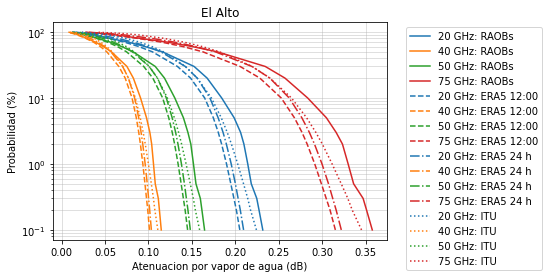

In [25]:
plt.grid(True, which="both", alpha=0.5)
#plt.xlim(0, 0.6)
plt.semilogy(ra20, prob, label='20 GHz: RAOBs')
plt.semilogy(ra40, prob, label='40 GHz: RAOBs')
plt.semilogy(ra50, prob, label='50 GHz: RAOBs')
plt.semilogy(ra75, prob, label='75 GHz: RAOBs')
plt.semilogy(ea20, prob, label='20 GHz: ERA5 12:00', ls='--', c='C0')
plt.semilogy(ea40, prob, label='40 GHz: ERA5 12:00', ls='--', c='C1')
plt.semilogy(ea50, prob, label='50 GHz: ERA5 12:00', ls='--', c='C2')
plt.semilogy(ea75, prob, label='75 GHz: ERA5 12:00', ls='--', c='C3')
plt.semilogy(eta20, prob, label='20 GHz: ERA5 24 h', ls='dashdot', c='C0')
plt.semilogy(eta40, prob, label='40 GHz: ERA5 24 h', ls='dashdot', c='C1')
plt.semilogy(eta50, prob, label='50 GHz: ERA5 24 h', ls='dashdot', c='C2')
plt.semilogy(eta75, prob, label='75 GHz: ERA5 24 h', ls='dashdot', c='C3')
plt.semilogy(ia20, prob, label='20 GHz: ITU', ls=':', c='C0')
plt.semilogy(ia40, prob, label='40 GHz: ITU', ls=':', c='C1')
plt.semilogy(ia50, prob, label='50 GHz: ITU', ls=':', c='C2')
plt.semilogy(ia75, prob, label='75 GHz: ITU', ls=':', c='C3')
#plt.legend(loc='best')
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.title('El Alto')
plt.xlabel('Atenuacion por vapor de agua (dB)')
plt.ylabel('Probabilidad (%)')
plt.show()

In [12]:
# 20 GHz
emean, erms = error(ea20, ra20)
imean, irms = error(ia20, ra20)
etmean, etrms = error(eta20, ra20)
print('20 GHz', emean, erms, imean, irms, etmean, etrms)
# 40 GHz
emean, erms = error(ea40, ra40)
imean, irms = error(ia40, ra40)
etmean, etrms = error(eta40, ra40)
print('40 GHz', emean, erms, imean, irms, etmean, etrms)
# 50 GHz
emean, erms = error(ea50, ra50)
imean, irms = error(ia50, ra50)
etmean, etrms = error(eta50, ra50)
print('50 GHz', emean, erms, imean, irms, etmean, etrms)
# 75 GHz
emean, erms = error(ea75, ra75)
imean, irms = error(ia75, ra75)
etmean, etrms = error(eta75, ra75)
print('75 GHz', emean, erms, imean, irms, etmean, etrms)

20 GHz 10.886 11.233 16.116 25.118 9.571 10.493
40 GHz 10.718 11.08 14.647 21.825 9.145 9.854
50 GHz 10.781 11.175 14.358 21.205 8.988 9.657
75 GHz 10.768 11.175 14.297 21.07 8.978 9.656


|                 | ERA5 12:00 |         | ERA5 24 h |         | ITU      |         |
|-----------------|------------|---------|---------------|---------|----------|---------|
| Frequency (GHz) | Mean (%)   | RMS (%) | Mean (%)      | RMS (%) | Mean (%) | RMS (%) |
| 20              | 10.886     | 11.233  | 9.571         | 10.493  | 16.116   | 25.118  |
| 40              | 10.718     | 11.080  | 9.145         | 9.854   | 14.647   | 21.825  |
| 50              | 10.781     | 11.175  | 8.988         | 9.657   | 14.358   | 21.205  |
| 75              | 10.768     | 11.175  | 8.978         | 9.656   | 14.297   | 21.07   |

### Probabilities vs Relative Error

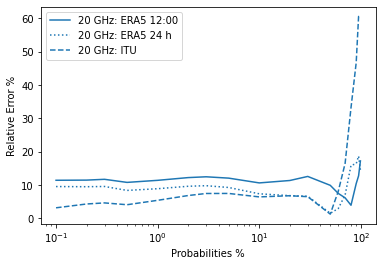

[ 7.46160877  6.15049431  3.92597634 10.42491084 12.76017001 17.23175454]
[ 2.94924857  7.00359647 15.90730534 16.3769788  18.67826191 14.55318887]
[ 8.15881097 16.49586301 33.21218136 46.74071984 60.59690207 60.61188239]


In [27]:
def ae(ap, rv):
    return 100 * np.abs(rv - ap) / rv
# ERA5 12:00
aee20 = ae(ea20, ra20)
aee40 = ae(ea40, ra40)
aee50 = ae(ea50, ra50)
aee75 = ae(ea75, ra75)
# ERA5 24 hours
aeet20 = ae(eta20, ra20)
aeet40 = ae(eta40, ra40)
aeet50 = ae(eta50, ra50)
aeet75 = ae(eta75, ra75)
# ITU
aei20 = ae(ia20, ra20)
aei40 = ae(ia40, ra40)
aei50 = ae(ia50, ra50)
aei75 = ae(ia75, ra75)

plt.semilogx(prob, aee20, label='20 GHz: ERA5 12:00', c='C0', ls='-')
#plt.semilogx(prob, aee40, label='40 GHz: ERA5', c='C1', ls='-')
#plt.semilogx(prob, aee50, label='50 GHz: ERA5', c='C2', ls='-')
#plt.semilogx(prob, aee75, label='75 GHz: ERA5', c='C3', ls='-')

plt.semilogx(prob, aeet20, label='20 GHz: ERA5 24 h', c='C0', ls=':')

plt.semilogx(prob, aei20, label='20 GHz: ITU', c='C0', ls='--')
#plt.semilogx(prob, aei40, label='40 GHz: ITU', c='C1', ls='--')
#plt.semilogx(prob, aei50, label='50 GHz: ITU', c='C2', ls='--')
#plt.semilogx(prob, aei75, label='75 GHz: ITU', c='C3', ls='--')

#plt.grid(True, which="both", alpha=0.5)
plt.legend(loc='best')
plt.ylabel('Relative Error %')
plt.xlabel('Probabilities %')
plt.show()

print(aee20[-6:])
print(aeet20[-6:])
print(aei20[-6:])